In [236]:
# SU KALİTE TAHMİNİ

In [237]:
# Bu veri seti, 3276 farklı su kaynağının içme suyu kalitesini değerlendirir. Her kaynağın su kalitesini etkileyen çeşitli parametreler bulunur.

# pH: Suyun asidik veya alkali olduğunu gösterir. WHO'ya göre 6.5-8.5 arası içme suyu için uygundur.
# Sertlik: Suya çözünen kalsiyum ve magnezyum tuzlarının miktarıdır, suyun sabunla köpürme yeteneğini etkiler.
# Katı Maddeler (TDS): Suya çözünmüş minerallerin toplamıdır; içme suyunda 500 mg/L'nin altında olmalıdır.
# Kloraminler: İçme suyu dezenfeksiyonunda kullanılan klor ve amonyağın birleşiminden oluşan kimyasallardır.
# Sülfat: Doğal kaynaklarda bulunan, suya karışabilen ve endüstriyel kullanımları olan bileşiklerdir.
# Elektriksel İletkenlik: Suda çözünmüş iyonların miktarını gösterir, suyun elektrik iletme kapasitesini belirtir.
# Organik Karbon (TOC): Suyun içinde bulunan organik maddelerin toplam karbon içeriğini ölçer.
# Trihalometanlar (THM): Klorlamadan kaynaklanan kimyasallar olup sağlık riskleri taşıyabilir.
# Bulanıklık: Su içindeki askıda katı maddelerin miktarını ve ışık geçirme kapasitesini ölçer.
# Potabilite: Suyun içilebilir olup olmadığını belirtir; 1 içilebilir, 0 ise içilemezdir.

In [238]:
# Gerekli Kütüphane ve Fonksiyonlar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action="ignore")

In [239]:
!pip install lightgbm
!pip install xgboost

In [240]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [241]:
import joblib
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [242]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [243]:
import warnings
warnings.simplefilter(action='ignore')
warnings.filterwarnings("ignore")

In [244]:
df_ = pd.read_csv("/content/water_potability.csv")

In [245]:
df = df_

In [246]:
# Genel olarak bir veri setimize bakalım
def check_df(dataframe, head=5):
  print("##################### Shape ##################### ")
  print(dataframe.shape)
  print("##################### Types ##################### ")
  print(dataframe.dtypes)
  print("##################### Head ##################### ")
  print(dataframe.head(head))
  print("##################### Tail ##################### ")
  print(dataframe.tail(head))
  print("##################### NA ##################### ")
  print(dataframe.isnull().sum())
  print("###################### Quanties ###################### ")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [247]:
check_df(df)

##################### Shape ##################### 
(3276, 10)
##################### Types ##################### 
ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object
##################### Head ##################### 
     ph  Hardness    Solids  Chloramines  Sulfate  Conductivity  Organic_carbon  Trihalomethanes  \
0   NaN   204.890 20791.319        7.300  368.516       564.309          10.380           86.991   
1 3.716   129.423 18630.058        6.635      NaN       592.885          15.180           56.329   
2 8.099   224.236 19909.542        9.276      NaN       418.606          16.869           66.420   
3 8.317   214.373 22018.417        8.059  356.886       363.267          18.437          100.342   
4 9.092   181.102 17978.986        6.547  310.136    

In [248]:
#Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"observations: {dataframe.shape[0]}")
  print(f"variables: {dataframe.shape[1]}")
  print(f"cat_cols: {len(cat_cols)}")
  print(f"num_cols: {len(num_cols)}")
  print(f"cat_but_car: {len(cat_but_car)}")
  print(f"num_but_cat: {len(num_but_cat)}")
  return cat_cols, num_cols, cat_but_car

In [249]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

observations: 3276
variables: 10
cat_cols: 1
num_cols: 9
cat_but_car: 0
num_but_cat: 1


In [250]:
grab_col_names(df)

observations: 3276
variables: 10
cat_cols: 1
num_cols: 9
cat_but_car: 0
num_but_cat: 1


(['Potability'],
 ['ph',
  'Hardness',
  'Solids',
  'Chloramines',
  'Sulfate',
  'Conductivity',
  'Organic_carbon',
  'Trihalomethanes',
  'Turbidity'],
 [])

In [251]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.716,129.423,18630.058,6.635,NaN,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,NaN,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0


In [252]:
# Kategorik Değişkenlerimizi Analiz Edelim

def cat_summary(dataframe, col_name, plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name], data = dataframe)
    plt.show()

            Potability  Ratio
Potability                   
0                 1998 60.989
1                 1278 39.011
##########################################


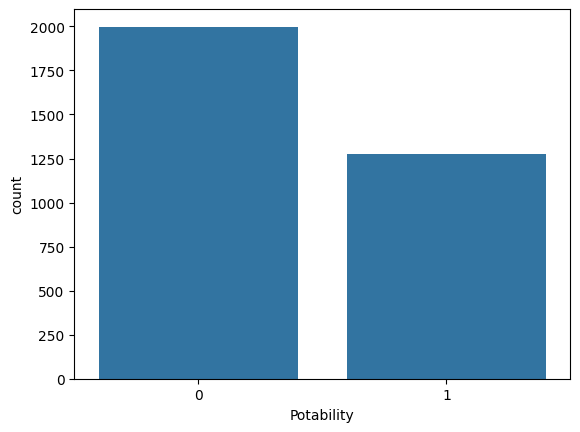

In [253]:
cat_summary(df, "Potability", True)

In [254]:
# Numerik Değişken Analizi

def num_summary(dataframe, numerical_col, plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[numerical_col].describe(quantiles).T)


  if plot:
    dataframe[numerical_col].hist(bins=20)
    plt.xlabel(numerical_col)
    plt.title(numerical_col)
    plt.show()

count   2785.000
mean       7.081
std        1.594
min        0.000
5%         4.488
10%        5.106
20%        5.822
30%        6.305
40%        6.702
50%        7.037
60%        7.437
70%        7.842
80%        8.311
90%        9.078
95%        9.790
99%       10.895
max       14.000
Name: ph, dtype: float64


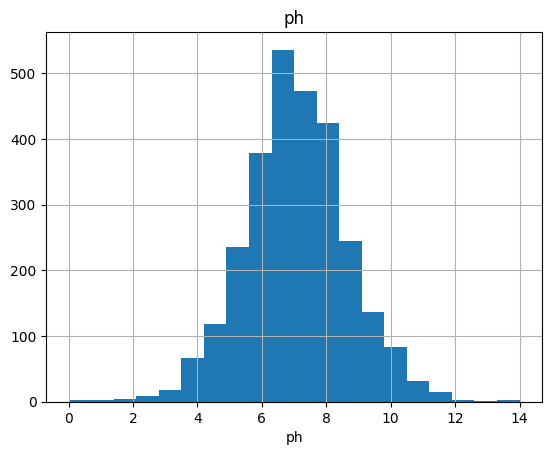

count   3276.000
mean     196.369
std       32.880
min       47.432
5%       141.763
10%      155.224
20%      169.944
30%      181.382
40%      189.261
50%      196.968
60%      204.124
70%      212.428
80%      222.269
90%      236.351
95%      249.610
99%      278.063
max      323.124
Name: Hardness, dtype: float64


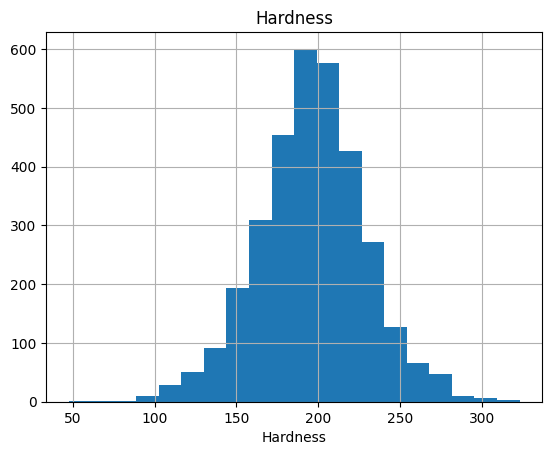

count    3276.000
mean    22014.093
std      8768.571
min       320.943
5%       9545.813
10%     11740.528
20%     14507.018
30%     16743.034
40%     18894.852
50%     20927.834
60%     23173.320
70%     25914.945
80%     28970.088
90%     33814.935
95%     38474.990
99%     45974.106
max     61227.196
Name: Solids, dtype: float64


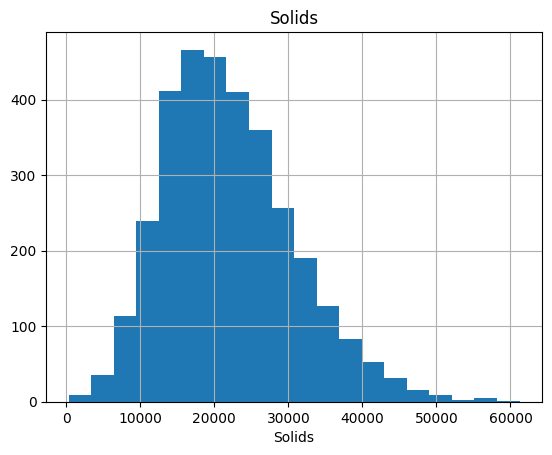

count   3276.000
mean       7.122
std        1.583
min        0.352
5%         4.503
10%        5.181
20%        5.886
30%        6.339
40%        6.742
50%        7.130
60%        7.493
70%        7.880
80%        8.377
90%        9.123
95%        9.753
99%       10.967
max       13.127
Name: Chloramines, dtype: float64


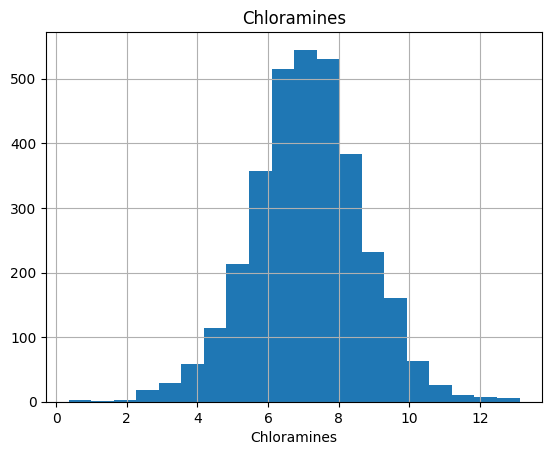

count   2495.000
mean     333.776
std       41.417
min      129.000
5%       266.616
10%      283.147
20%      301.074
30%      314.053
40%      323.531
50%      333.074
60%      342.095
70%      353.003
80%      367.369
90%      385.967
95%      403.070
99%      434.022
max      481.031
Name: Sulfate, dtype: float64


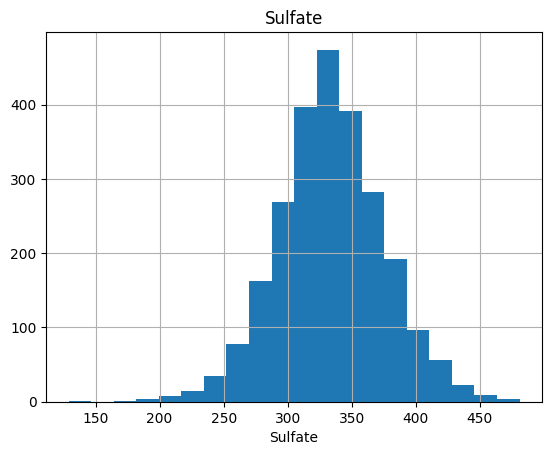

count   3276.000
mean     426.205
std       80.824
min      181.484
5%       300.109
10%      325.117
20%      353.740
30%      377.682
40%      399.883
50%      421.885
60%      443.570
70%      470.462
80%      496.364
90%      533.297
95%      566.349
99%      617.627
max      753.343
Name: Conductivity, dtype: float64


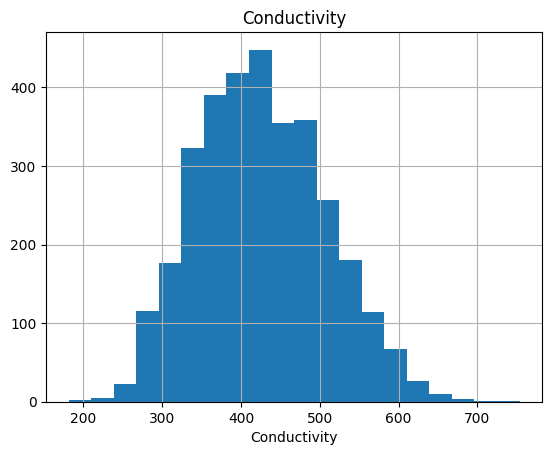

count   3276.000
mean      14.285
std        3.308
min        2.200
5%         8.815
10%       10.124
20%       11.540
30%       12.507
40%       13.433
50%       14.218
60%       15.102
70%       16.033
80%       17.132
90%       18.505
95%       19.637
99%       22.090
max       28.300
Name: Organic_carbon, dtype: float64


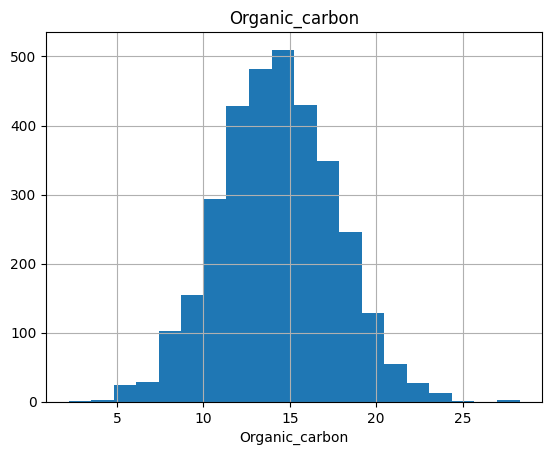

count   3114.000
mean      66.396
std       16.175
min        0.738
5%        39.553
10%       45.846
20%       53.107
30%       58.690
40%       62.656
50%       66.622
60%       70.446
70%       74.886
80%       79.701
90%       86.492
95%       92.124
99%      104.739
max      124.000
Name: Trihalomethanes, dtype: float64


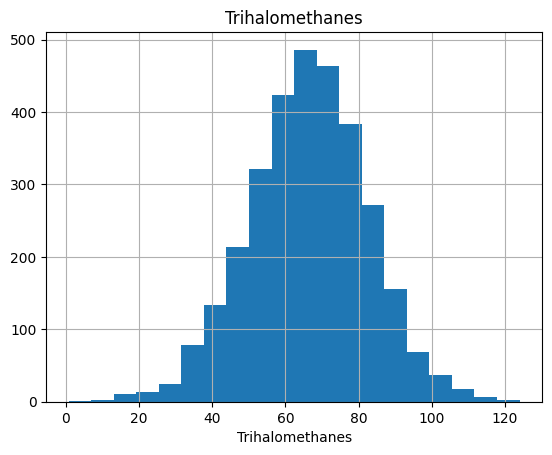

count   3276.000
mean       3.967
std        0.780
min        1.450
5%         2.684
10%        2.952
20%        3.306
30%        3.557
40%        3.764
50%        3.955
60%        4.168
70%        4.377
80%        4.621
90%        4.977
95%        5.221
99%        5.742
max        6.739
Name: Turbidity, dtype: float64


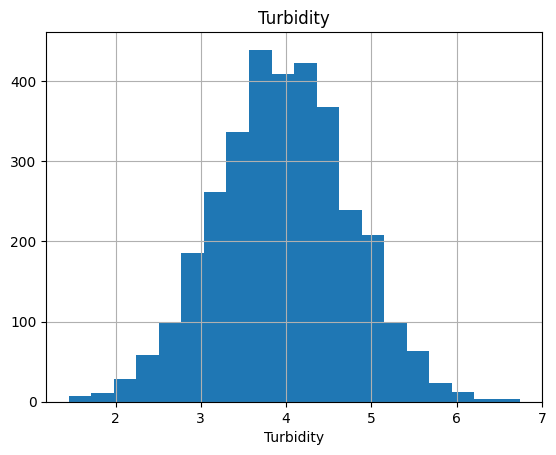

In [255]:
for col in num_cols:
  num_summary(df, col, plot=True)

In [256]:
# Numerik Değişkenlerin Hedef Değişkene Göre Analizi

def target_summary_with_num(dataframe, target, numerical_col):
  print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [257]:
for col in num_cols:
  target_summary_with_num(df, "Potability", col)

              ph
Potability      
0          7.085
1          7.074


            Hardness
Potability          
0            196.733
1            195.801


              Solids
Potability          
0          21777.491
1          22383.991


            Chloramines
Potability             
0                 7.092
1                 7.169


            Sulfate
Potability         
0           334.564
1           332.567


            Conductivity
Potability              
0                426.730
1                425.384


            Organic_carbon
Potability                
0                   14.364
1                   14.161


            Trihalomethanes
Potability                 
0                    66.304
1                    66.540


            Turbidity
Potability           
0               3.966
1               3.968




In [258]:
# KORELASYON

In [259]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000,0.082,-0.089,-0.034,0.018,0.019,0.044,0.003,-0.039,-0.004
Hardness,0.082,1.000,-0.047,-0.030,-0.107,-0.024,0.004,-0.013,-0.014,-0.014
Solids,-0.089,-0.047,1.000,-0.070,-0.172,0.014,0.010,-0.009,0.020,0.034
Chloramines,-0.034,-0.030,-0.070,1.000,0.027,-0.020,-0.013,0.017,0.002,0.024
Sulfate,0.018,-0.107,-0.172,0.027,1.000,-0.016,0.031,-0.030,-0.011,-0.024
Conductivity,0.019,-0.024,0.014,-0.020,-0.016,1.000,0.021,0.001,0.006,-0.008
Organic_carbon,0.044,0.004,0.010,-0.013,0.031,0.021,1.000,-0.013,-0.027,-0.030
Trihalomethanes,0.003,-0.013,-0.009,0.017,-0.030,0.001,-0.013,1.000,-0.022,0.007
Turbidity,-0.039,-0.014,0.020,0.002,-0.011,0.006,-0.027,-0.022,1.000,0.002
Potability,-0.004,-0.014,0.034,0.024,-0.024,-0.008,-0.030,0.007,0.002,1.000


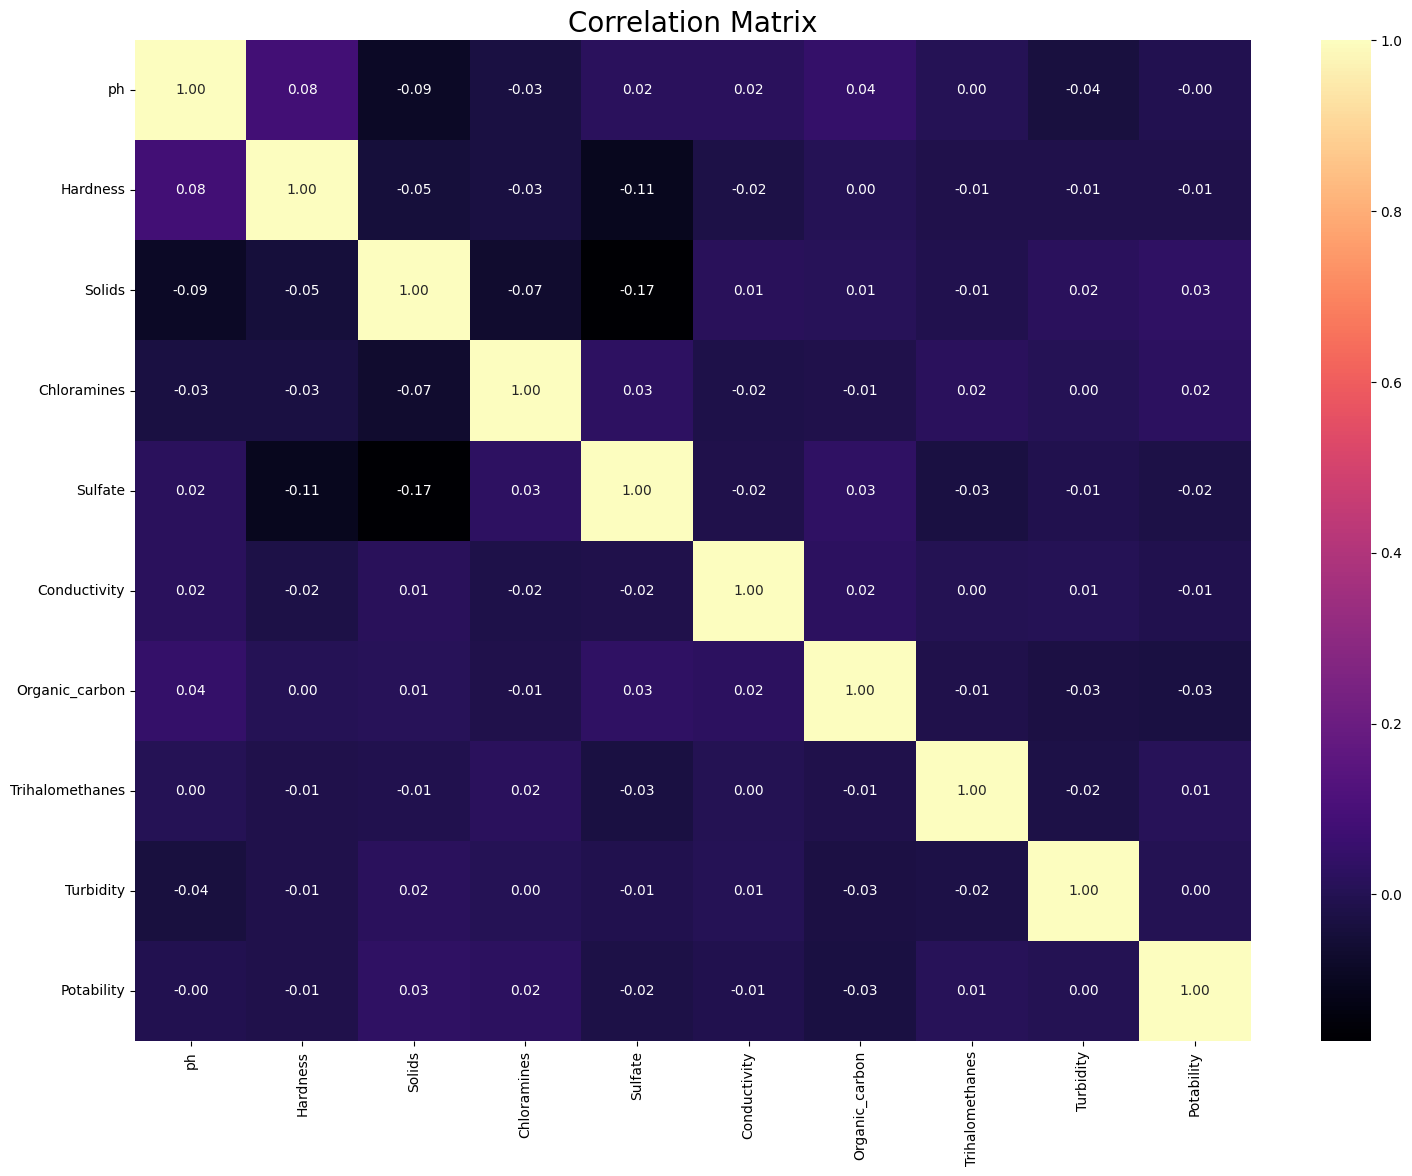

In [260]:
# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax = ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [261]:
# Eksik değer varsa eksik değerlerin toplamını ve oranını yazdıran fonksiyon
def missing_values_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
  print(missing_df, end="\n")

  if na_name:
    return na_columns

In [262]:
na_columns = missing_values_table(df,True)

                 n_miss  ratio
Sulfate             781 23.840
ph                  491 14.990
Trihalomethanes     162  4.950


In [263]:
# Eksik değerlerin bağımlı değişken ile ilişkisini inceleyelim

def missing_vs_target(dataframe, target, na_columns):
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                          "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")

In [264]:
missing_vs_target(df, "Potability", na_columns)

            TARGET_MEAN  Count
ph_NA_FLAG                    
0                 0.395   2785
1                 0.360    491


                 TARGET_MEAN  Count
Sulfate_NA_FLAG                    
0                      0.395   2495
1                      0.375    781


                         TARGET_MEAN  Count
Trihalomethanes_NA_FLAG                    
0                              0.393   3114
1                              0.340    162




In [265]:
# Eksik Değerlerin Doldurulması
df["ph"].fillna(df.groupby("Potability")["ph"].transform("median"), inplace=True)
df["Sulfate"].fillna(df.groupby("Potability")["Sulfate"].transform("median"), inplace=True)
df["Trihalomethanes"].fillna(df.groupby("Potability")["Trihalomethanes"].transform("median"), inplace=True)

In [266]:
# Eksik Değerlerimize Bakalım
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [267]:
# Öyle bir fonksiyon yazalım ki kendisine girilen değerlerin eşik değerlerini hesaplıyor olsun
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [268]:
# Şimdi aykırı değer var mı yok mu diye bir fonksiyon yazalım

def check_outlier(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [269]:
def replace_with_thresholds(dataframe, variable):
  low_limit, up_limit = outlier_thresholds(dataframe, variable)
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit     # Alt aykırı değer varsa low_limit'e eşitle
  dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit       # Üst aykırı değer varsa up_limit'e eşitle

In [270]:
# Aykırı Değer Analizi ve Baskılama İşlemi

for col in df.columns:
  print(col, check_outlier(df, col))
  if check_outlier(df, col):
    replace_with_thresholds(df, col)

ph True
Hardness True
Solids True
Chloramines True
Sulfate True
Conductivity True
Organic_carbon True
Trihalomethanes True
Turbidity True
Potability False


In [271]:
for col in df.columns:
  print(col, check_outlier(df, col))

ph False
Hardness False
Solids False
Chloramines False
Sulfate False
Conductivity False
Organic_carbon False
Trihalomethanes False
Turbidity False
Potability False


In [272]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.035,204.890,20791.319,7.300,368.516,564.309,10.380,86.991,2.963,0
1,3.889,129.423,18630.058,6.635,333.389,592.885,15.180,56.329,4.501,0
2,8.099,224.236,19909.542,9.276,333.389,418.606,16.869,66.420,3.056,0
3,8.317,214.373,22018.417,8.059,356.886,363.267,18.437,100.342,4.629,0
4,9.092,181.102,17978.986,6.547,310.136,398.411,11.558,31.998,4.075,0


In [273]:
def potability_data_prep(df):
  # Özellik Çıkarımı
  df["ph_Category"] = pd.cut(df["ph"], bins=[0, 6.5, 8.5, 14], labels=["Asidik", "Nötr", "Bazik"])
  df["Total_Chemicals"] = df["Sulfate"] + df["Trihalomethanes"] + df["Chloramines"] + df["Organic_carbon"]

  cat_cols, num_cols, cat_but_car = grab_col_names(df)

  # Label Encoding
  def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

  binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

  for col in binary_cols:
    df = label_encoder(df, col)

  # One-Hot Encoding İşlemi
  # cat_cols listesinin güncelleme işlemi
  cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Potability"]]


  def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

  df = one_hot_encoder(df, cat_cols, drop_first=True)

  # boolean değerleri numeric yapalım
  df = df.applymap(lambda x: int(x) if isinstance(x, bool) else x)


  scaler = StandardScaler()
  df[num_cols] = scaler.fit_transform(df[num_cols])


  # MODELLEME
  y = df["Potability"]
  X = df.drop("Potability", axis=1)

  return X, y


In [274]:
# Base Models
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier())
                   ]
    for name, classifier in classifiers:
         cv_results = cross_validate(classifier, X, y, cv=3, scoring=scoring)
         print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [275]:
# Hyperparameter Optimization

In [276]:
rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

In [277]:
# Hata almamak için ön tanımlı değerleride dikkate almamız gerekiyor.
gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8, 10],
              "n_estimators": [100, 500, 1000],
              "subsample": [1, 0.5, 0.7]}

In [278]:
xgboost_params = {"learning_rate": [0.01, 0.1],
                  "max_depth": [3, 6, 9],
                  "n_estimators": [100, 300, 500]}


In [279]:
lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1]}

In [280]:
classifiers = [
               ("RF", RandomForestClassifier(), rf_params),
               ("GBM", GradientBoostingClassifier(), gbm_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)
               ]

In [281]:
def hyperparameter_optimization(X, y, cv=3, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [282]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[('RF', best_models["RF"]),
                                              ('GBM', best_models["GBM"]),
                                              ('XGBoost', best_models["XGBoost"]),
                                              ('LightGBM', best_models["LightGBM"]),],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [283]:
def main():
    X, y = potability_data_prep(df)
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    voting_clf = voting_classifier(best_models, X, y)
    joblib.dump(voting_clf, "voting_clf.pkl")
    return voting_clf

In [284]:
if __name__ == "__main__":
    print("İşlem başladı")
    main()

İşlem başladı
observations: 3276
variables: 12
cat_cols: 2
num_cols: 10
cat_but_car: 0
num_but_cat: 2
Base Models....
roc_auc: 0.5186 (LR) 
roc_auc: 0.556 (KNN) 
roc_auc: 0.6089 (SVC) 
roc_auc: 0.6911 (CART) 
roc_auc: 0.8146 (RF) 
roc_auc: 0.8031 (Adaboost) 
roc_auc: 0.8281 (GBM) 
roc_auc: 0.8214 (XGBoost) 
[LightGBM] [Info] Number of positive: 852, number of negative: 1332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2554
[LightGBM] [Info] Number of data points in the train set: 2184, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.390110 -> initscore=-0.446850
[LightGBM] [Info] Start training from score -0.446850
[LightGBM] [Info] Number of positive: 852, number of negative: 1332
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhea